In [1]:
!pip list

Package                          Version
-------------------------------- ---------------------
absl-py                          1.4.0
aiohttp                          3.8.5
aiosignal                        1.3.1
alabaster                        0.7.13
albumentations                   1.3.1
altair                           4.2.2
anyio                            3.7.1
appdirs                          1.4.4
argon2-cffi                      23.1.0
argon2-cffi-bindings             21.2.0
array-record                     0.4.1
arviz                            0.15.1
astropy                          5.3.3
astunparse                       1.6.3
async-timeout                    4.0.3
attrs                            23.1.0
audioread                        3.0.0
autograd                         1.6.2
Babel                            2.12.1
backcall                         0.2.0
beautifulsoup4                   4.11.2
bleach                           6.0.0
blinker                          1.4
bl

In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

1. Early Stopping
2. Data Scaling
3. Drop Out
4. Regularization
5. Batch Normalization
6. Weight Initialization

# 1. Early Stopping

In [3]:
from sklearn.datasets import make_circles

In [4]:
X,y = make_circles(n_samples=250,noise=0.2,random_state=10)

In [5]:
X

array([[-1.24012692e+00,  4.10199815e-01],
       [ 1.36665289e+00, -1.26193513e-01],
       [-9.59759481e-01,  1.70443543e-01],
       [-5.47807915e-02,  1.02231120e+00],
       [ 8.79839462e-01, -1.19076837e+00],
       [ 8.25040216e-01, -1.80582935e-02],
       [-5.47719301e-01, -3.34604783e-01],
       [-2.67025157e-01, -8.90196938e-01],
       [ 1.51151983e-04, -5.00114889e-01],
       [-8.07543598e-01,  7.73887309e-01],
       [-3.89796889e-01,  1.09126421e+00],
       [-9.55515993e-01,  6.74314747e-02],
       [ 6.66387258e-01, -3.18492233e-01],
       [ 1.63109871e-01, -9.58736495e-01],
       [ 1.00009625e-01,  5.56474269e-01],
       [ 4.12830274e-01, -7.90894903e-01],
       [-1.09785335e+00, -2.42920076e-01],
       [ 5.76200038e-01,  5.27486536e-01],
       [-5.46298151e-01, -9.60082451e-01],
       [-5.93244277e-01, -1.10380410e+00],
       [-1.30484243e+00,  2.82199896e-01],
       [ 5.36893890e-01, -5.12805818e-01],
       [ 5.66872703e-01,  7.31434428e-01],
       [ 6.

In [6]:
y

array([0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 0])

<Axes: >

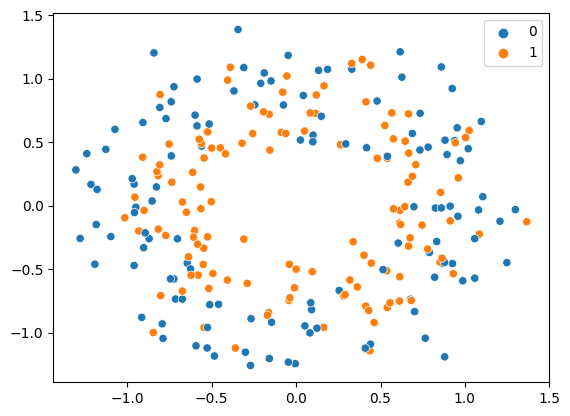

In [7]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [9]:
X_train.shape

(200, 2)

In [10]:
X_test.shape

(50, 2)

In [11]:
model = Sequential()

In [12]:
model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [13]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [14]:
model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=3000,verbose=2)

Streaming output truncated to the last 5000 lines.
Epoch 501/3000
7/7 - 0s - loss: 0.5139 - accuracy: 0.7650 - val_loss: 0.6952 - val_accuracy: 0.7000 - 48ms/epoch - 7ms/step
Epoch 502/3000
7/7 - 0s - loss: 0.5139 - accuracy: 0.7550 - val_loss: 0.6989 - val_accuracy: 0.6800 - 63ms/epoch - 9ms/step
Epoch 503/3000
7/7 - 0s - loss: 0.5135 - accuracy: 0.7500 - val_loss: 0.7038 - val_accuracy: 0.6800 - 50ms/epoch - 7ms/step
Epoch 504/3000
7/7 - 0s - loss: 0.5146 - accuracy: 0.7500 - val_loss: 0.7062 - val_accuracy: 0.6800 - 66ms/epoch - 9ms/step
Epoch 505/3000
7/7 - 0s - loss: 0.5151 - accuracy: 0.7500 - val_loss: 0.7104 - val_accuracy: 0.6800 - 48ms/epoch - 7ms/step
Epoch 506/3000
7/7 - 0s - loss: 0.5164 - accuracy: 0.7550 - val_loss: 0.7117 - val_accuracy: 0.6800 - 48ms/epoch - 7ms/step
Epoch 507/3000
7/7 - 0s - loss: 0.5148 - accuracy: 0.7500 - val_loss: 0.6980 - val_accuracy: 0.6600 - 71ms/epoch - 10ms/step
Epoch 508/3000
7/7 - 0s - loss: 0.5148 - accuracy: 0.7600 - val_loss: 0.6907 - v

In [15]:
history = model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=3000,verbose=0)

In [16]:
history.history["loss"]

[0.49439266324043274,
 0.4950333535671234,
 0.49474215507507324,
 0.4958465099334717,
 0.4941951036453247,
 0.4950522184371948,
 0.49471715092658997,
 0.49481624364852905,
 0.49596214294433594,
 0.4952571392059326,
 0.49456527829170227,
 0.4944087564945221,
 0.49632927775382996,
 0.4951692223548889,
 0.49627071619033813,
 0.4949668049812317,
 0.4968005418777466,
 0.4968520402908325,
 0.49755147099494934,
 0.4969269037246704,
 0.49756211042404175,
 0.49609556794166565,
 0.49456921219825745,
 0.4935084283351898,
 0.4968867599964142,
 0.4951937198638916,
 0.4956073462963104,
 0.4947798550128937,
 0.4964739978313446,
 0.49463921785354614,
 0.49528148770332336,
 0.49415263533592224,
 0.4980187714099884,
 0.4978969097137451,
 0.49582913517951965,
 0.49598002433776855,
 0.49576136469841003,
 0.49565017223358154,
 0.49493229389190674,
 0.49446284770965576,
 0.49482616782188416,
 0.4971299469470978,
 0.49440115690231323,
 0.49357330799102783,
 0.4974174499511719,
 0.496860146522522,
 0.49531421

In [17]:
history.history["val_loss"]

[0.7283569574356079,
 0.7280697822570801,
 0.7336376905441284,
 0.7291696071624756,
 0.7354725003242493,
 0.7411054372787476,
 0.7375496625900269,
 0.7362036108970642,
 0.739264965057373,
 0.7335432171821594,
 0.7366903424263,
 0.7377765774726868,
 0.7241020202636719,
 0.7197911739349365,
 0.7164351940155029,
 0.7255614399909973,
 0.7454367280006409,
 0.754281759262085,
 0.755811333656311,
 0.7527790665626526,
 0.7320287823677063,
 0.7267107963562012,
 0.7365831732749939,
 0.7364359498023987,
 0.7340613603591919,
 0.7345412373542786,
 0.7378968000411987,
 0.743183970451355,
 0.7460696697235107,
 0.7415831685066223,
 0.7431559562683105,
 0.7278292775154114,
 0.7292875647544861,
 0.7364504933357239,
 0.734780490398407,
 0.7405428886413574,
 0.7464202642440796,
 0.7431430816650391,
 0.7359930276870728,
 0.7290600538253784,
 0.7329621911048889,
 0.7212647199630737,
 0.7310824394226074,
 0.741956353187561,
 0.7553079724311829,
 0.7454362511634827,
 0.7390329837799072,
 0.7329725027084351,
 

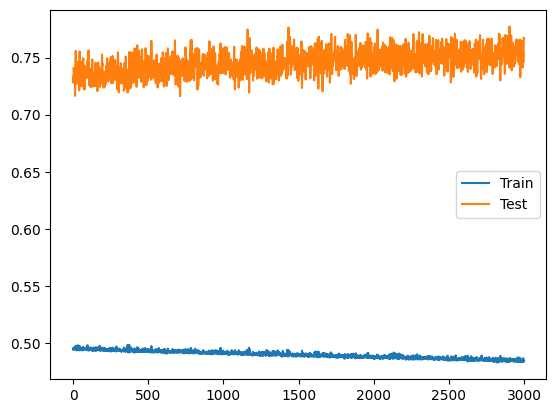

In [18]:
plt.plot(history.history["loss"], label = "Train")
plt.plot(history.history["val_loss"], label = "Test")
plt.legend()
plt.show()

In [19]:
model = Sequential()
model.add(Dense(200,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [20]:
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.01,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    patience=30
)

In [21]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=3000,callbacks=callback)

Epoch 1/3000
7/7 [==============================] - 1s 32ms/step - loss: 0.6905 - accuracy: 0.5050 - val_loss: 0.6967 - val_accuracy: 0.4400
Epoch 2/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.6871 - accuracy: 0.5250 - val_loss: 0.7027 - val_accuracy: 0.4000
Epoch 3/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.6845 - accuracy: 0.5250 - val_loss: 0.7074 - val_accuracy: 0.4000
Epoch 4/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.6822 - accuracy: 0.5250 - val_loss: 0.7075 - val_accuracy: 0.4000
Epoch 5/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.6808 - accuracy: 0.5250 - val_loss: 0.7096 - val_accuracy: 0.4000
Epoch 6/3000
7/7 [==============================] - 0s 10ms/step - loss: 0.6802 - accuracy: 0.5250 - val_loss: 0.7127 - val_accuracy: 0.4000
Epoch 7/3000
7/7 [==============================] - 0s 8ms/step - loss: 0.6786 - accuracy: 0.5250 - val_loss: 0.7125 - val_accuracy: 0.4000
Epoch 8/3000
7/7

# 2. Data Scaling

In [22]:
import pandas as pd
df=pd.read_csv("https://raw.githubusercontent.com/sharmaroshan/Social-Networks-Ads/master/Social_Network_Ads.csv")

In [23]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


In [24]:
df=df.iloc[:,2:]

In [25]:
df.head()

,Age,EstimatedSalary,Purchased
0,19.0,19000.0,0
1,35.0,20000.0,0
2,26.0,43000.0,0
3,27.0,57000.0,0
4,19.0,76000.0,0


<Axes: xlabel='Age', ylabel='EstimatedSalary'>

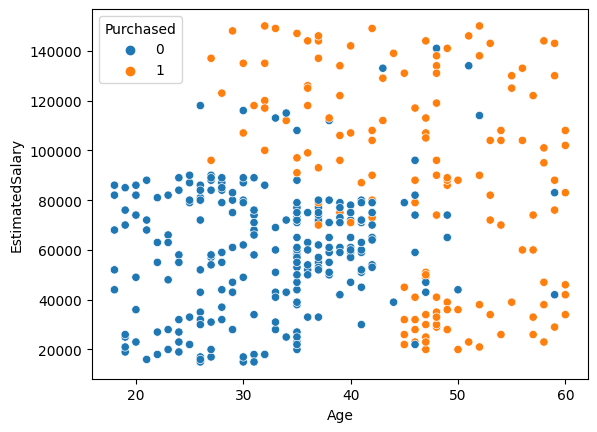

In [26]:
sns.scatterplot(x=df["Age"],y=df["EstimatedSalary"],hue=df["Purchased"])

In [27]:
X=df.iloc[:,0:2]
y=df.iloc[:,-1]
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [28]:
df.shape

(400, 3)

In [29]:
X_train.shape

(320, 2)

In [30]:
X_test.shape

(80, 2)

In [31]:
model = Sequential()
model.add(Dense(128,input_dim=2,activation='relu'))
model.add(Dense(1,activation='sigmoid'))



In [32]:
model.summary() # Here we Get Trainable parameters

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513 (2.00 KB)
Trainable params: 513 (2.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])

In [34]:
history=model.fit(X_train, y_train,validation_data=(X_test,y_test),epochs=100,verbose=2)

Epoch 1/100
10/10 - 1s - loss: 103.5698 - accuracy: 0.5719 - val_loss: 8.8681 - val_accuracy: 0.6000 - 1s/epoch - 112ms/step
Epoch 2/100
10/10 - 0s - loss: 61.0938 - accuracy: 0.4969 - val_loss: 154.8963 - val_accuracy: 0.6000 - 66ms/epoch - 7ms/step
Epoch 3/100
10/10 - 0s - loss: 75.0617 - accuracy: 0.5969 - val_loss: 48.0352 - val_accuracy: 0.4000 - 64ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 39.8886 - accuracy: 0.5531 - val_loss: 57.3640 - val_accuracy: 0.4000 - 54ms/epoch - 5ms/step
Epoch 5/100
10/10 - 0s - loss: 43.7178 - accuracy: 0.5594 - val_loss: 24.4551 - val_accuracy: 0.4000 - 52ms/epoch - 5ms/step
Epoch 6/100
10/10 - 0s - loss: 60.0168 - accuracy: 0.5531 - val_loss: 63.3559 - val_accuracy: 0.6000 - 77ms/epoch - 8ms/step
Epoch 7/100
10/10 - 0s - loss: 39.7248 - accuracy: 0.4969 - val_loss: 3.9658 - val_accuracy: 0.6000 - 52ms/epoch - 5ms/step
Epoch 8/100
10/10 - 0s - loss: 83.5933 - accuracy: 0.5094 - val_loss: 199.7905 - val_accuracy: 0.4000 - 64ms/epoch - 6ms/step

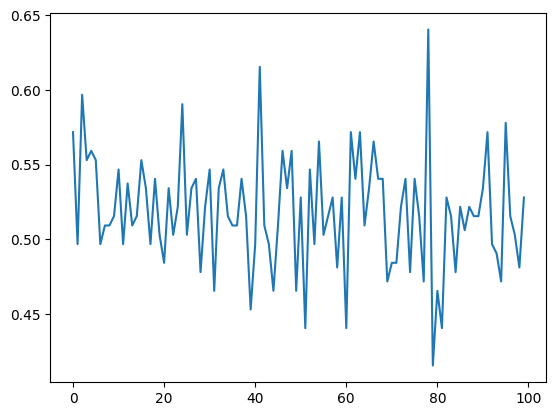

In [35]:
plt.plot(history.history['accuracy'])

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
X_train_scaled

array([[ 0.88928823, -0.65924556],
       [-0.17254846,  0.87392651],
       [-1.04132394, -0.36440478],
       [ 0.98581884,  0.6085698 ],
       [-0.94479333,  0.57908572],
       [ 0.40663519,  0.01888824],
       [ 0.98581884,  2.11225779],
       [ 0.31010458, -0.30543662],
       [ 1.7580637 , -0.27595254],
       [-0.17254846,  2.20071003],
       [ 1.7580637 ,  1.0213469 ],
       [-1.33091576, -1.48479975],
       [ 2.04765553,  0.54960165],
       [ 1.27541066,  1.90586924],
       [-1.13785454,  0.31372902],
       [-0.36560968, -0.77718187],
       [-1.71703819,  0.49063349],
       [-0.5586709 , -1.51428383],
       [ 0.31010458, -0.71821372],
       [ 0.02051275, -0.57079333],
       [ 0.02051275,  0.04837232],
       [-0.07601785, -0.51182517],
       [-0.6552015 , -1.51428383],
       [ 0.02051275,  0.31372902],
       [ 0.31010458,  0.07785639],
       [-0.46214029, -1.13099081],
       [-0.75173211, -1.54376791],
       [-0.26907907, -0.65924556],
       [-1.13785454,

<Axes: >

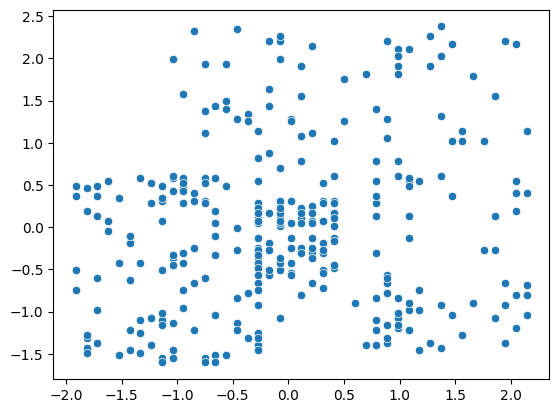

In [38]:
sns.scatterplot(x=X_train_scaled[:,0],y=X_train_scaled[:,1])

In [39]:
callback = EarlyStopping(
    monitor="accuracy",
    min_delta=0.001,
    mode="auto",
    verbose=1,
    baseline=None,
    restore_best_weights=False,
    patience=20
)

In [40]:
history=model.fit(X_train_scaled,y_train,validation_data=(X_test_scaled,y_test),epochs=100,verbose=2,callbacks=callback)

Epoch 1/100
10/10 - 0s - loss: 0.6842 - accuracy: 0.6531 - val_loss: 0.6697 - val_accuracy: 0.6000 - 359ms/epoch - 36ms/step
Epoch 2/100
10/10 - 0s - loss: 0.5901 - accuracy: 0.6656 - val_loss: 0.5717 - val_accuracy: 0.6250 - 52ms/epoch - 5ms/step
Epoch 3/100
10/10 - 0s - loss: 0.4984 - accuracy: 0.7281 - val_loss: 0.4830 - val_accuracy: 0.7500 - 60ms/epoch - 6ms/step
Epoch 4/100
10/10 - 0s - loss: 0.4284 - accuracy: 0.7875 - val_loss: 0.4132 - val_accuracy: 0.7875 - 76ms/epoch - 8ms/step
Epoch 5/100
10/10 - 0s - loss: 0.3770 - accuracy: 0.8281 - val_loss: 0.3718 - val_accuracy: 0.8000 - 62ms/epoch - 6ms/step
Epoch 6/100
10/10 - 0s - loss: 0.3456 - accuracy: 0.8500 - val_loss: 0.3575 - val_accuracy: 0.8000 - 67ms/epoch - 7ms/step
Epoch 7/100
10/10 - 0s - loss: 0.3290 - accuracy: 0.8687 - val_loss: 0.3490 - val_accuracy: 0.8250 - 51ms/epoch - 5ms/step
Epoch 8/100
10/10 - 0s - loss: 0.3193 - accuracy: 0.8719 - val_loss: 0.3474 - val_accuracy: 0.8250 - 52ms/epoch - 5ms/step
Epoch 9/100
10

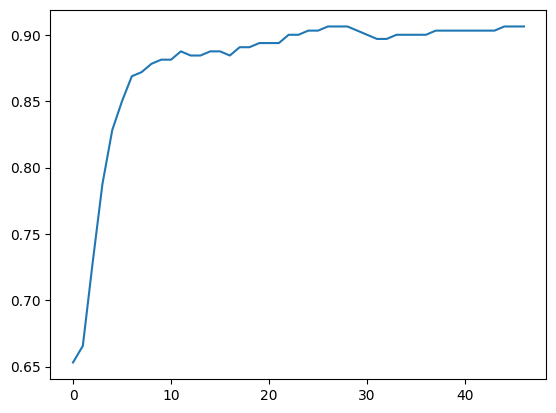

In [41]:
plt.plot(history.history['accuracy'])

# 3. Drop Out

In [42]:
import numpy as np
X = np.array([[-1.58986e-01,  4.23977e-01],
       [-3.47926e-01,  4.70760e-01],
       [-5.04608e-01,  3.53801e-01],
       [-5.96774e-01,  1.14035e-01],
       [-5.18433e-01, -1.72515e-01],
       [-2.92627e-01, -2.07602e-01],
       [-1.58986e-01, -4.38596e-02],
       [-5.76037e-02,  1.43275e-01],
       [-7.14286e-02,  2.71930e-01],
       [-2.97235e-01,  3.47953e-01],
       [-4.17051e-01,  2.01754e-01],
       [-4.40092e-01,  8.77193e-03],
       [-3.24885e-01, -3.21637e-02],
       [-2.46544e-01,  5.55556e-02],
       [-2.18894e-01,  2.01754e-01],
       [-3.43318e-01,  1.60819e-01],
       [-5.09217e-01,  7.89474e-02],
       [-3.84793e-01, -9.06433e-02],
       [-1.49770e-01,  1.25731e-01],
       [-1.95853e-01,  3.24561e-01],
       [-3.91705e-02, -2.19298e-01],
       [-1.08295e-01, -3.01170e-01],
       [-1.86636e-01, -3.30409e-01],
       [-2.18894e-01, -4.23977e-01],
       [-8.06452e-02, -5.64327e-01],
       [ 6.68203e-02, -5.17544e-01],
       [ 9.44700e-02, -3.24561e-01],
       [ 1.86636e-01, -1.66667e-01],
       [ 6.22120e-02, -7.30994e-02],
       [ 2.07373e-02, -1.95906e-01],
       [ 2.99539e-02, -3.42105e-01],
       [-9.90783e-02, -3.77193e-01],
       [-6.91244e-03, -4.64912e-01],
       [ 1.31336e-01, -4.29825e-01],
       [ 2.32719e-01, -1.95906e-01],
       [ 8.52535e-02, -8.47953e-02],
       [-1.31336e-01, -2.36842e-01],
       [ 2.30415e-03, -1.25731e-01],
       [ 1.22120e-01, -2.92398e-03],
       [-3.47926e-01, -3.12865e-01],
       [-2.28111e-01, -1.25731e-01],
       [-7.60369e-02,  1.46199e-02],
       [ 4.37788e-02,  2.04678e-02],
       [ 1.15207e-02,  1.54971e-01],
       [-4.17051e-01, -1.60819e-01],
       [-3.15668e-01, -3.18713e-01],
       [ 1.26728e-01, -2.19298e-01],
       [ 2.05069e-01, -3.12865e-01],
       [ 2.18894e-01, -4.59064e-01],
       [ 7.14286e-02, -6.46199e-01],
       [-1.31336e-01, -6.05263e-01],
       [-2.09677e-01, -5.81871e-01],
       [-2.28111e-01, -4.29825e-01],
       [-1.45161e-01, -4.12281e-01],
       [-6.68203e-02, -4.82456e-01],
       [ 1.35945e-01, -5.11696e-01],
       [ 2.69585e-01, -4.06433e-01],
       [ 2.97235e-01, -2.95322e-01],
       [ 2.74194e-01, -1.72515e-01],
       [ 2.55760e-01, -4.97076e-02],
       [ 2.23502e-01, -4.97076e-02],
       [ 1.82028e-01, -8.47953e-02],
       [ 1.58986e-01, -1.54971e-01],
       [ 7.14286e-02, -2.13450e-01],
       [ 1.61290e-02, -2.66082e-01],
       [-2.53456e-02, -3.83041e-01],
       [-1.15207e-02, -4.82456e-01],
       [-2.30415e-03, -5.05848e-01],
       [ 2.53456e-02, -5.11696e-01],
       [ 2.53456e-02, -5.58480e-01],
       [ 1.15207e-02, -6.57895e-01],
       [-4.83871e-02, -6.46199e-01],
       [-8.52535e-02, -5.52632e-01],
       [-9.90783e-02, -5.00000e-01],
       [-1.61290e-02, -4.23977e-01],
       [ 1.31336e-01, -3.59649e-01],
       [ 2.23502e-01, -3.71345e-01],
       [ 2.92627e-01, -3.01170e-01],
       [ 2.60369e-01, -2.07602e-01],
       [ 2.00461e-01, -2.25146e-01],
       [ 1.72811e-01, -2.71930e-01],
       [-1.31336e-01,  9.06433e-02],
       [-1.49770e-01,  7.30994e-02],
       [-2.41935e-01,  6.14035e-02],
       [-3.01843e-01,  1.78363e-01],
       [-2.97235e-01,  1.95906e-01],
       [-2.74194e-01,  3.07018e-01],
       [-3.24885e-01,  2.95322e-01],
       [-3.98618e-01,  2.66082e-01],
       [-4.35484e-01,  1.60819e-01],
       [-4.72350e-01,  7.89474e-02],
       [-3.38710e-01,  4.38596e-02],
       [-2.69585e-01,  4.38596e-02],
       [-2.55760e-01,  1.02339e-01],
       [-1.68203e-01,  2.66082e-01],
       [-1.12903e-01,  3.01170e-01],
       [-3.91705e-02,  3.47953e-01],
       [-1.26728e-01,  4.41520e-01],
       [-2.32719e-01,  4.41520e-01],
       [-3.38710e-01,  4.18129e-01],
       [-4.12442e-01,  3.53801e-01],
       [-5.09217e-01,  2.19298e-01],
       [-5.41475e-01,  1.46199e-02],
       [-5.04608e-01, -1.25731e-01],
       [-4.90783e-01, -1.43275e-01],
       [-3.61751e-01, -1.37427e-01],
       [-2.69585e-01, -8.47953e-02],
       [-2.23502e-01, -7.89474e-02],
       [-1.86636e-01, -3.80117e-02],
       [-1.54378e-01, -8.77193e-03],
       [-1.12903e-01,  5.55556e-02],
       [-8.52535e-02,  1.37427e-01],
       [-8.52535e-02,  2.77778e-01],
       [-1.68203e-01,  3.01170e-01],
       [-1.91244e-01,  1.95906e-01],
       [-1.40553e-01, -4.97076e-02],
       [-2.99539e-02,  6.72515e-02],
       [-2.00461e-01, -2.30994e-01],
       [-1.08295e-01, -8.47953e-02],
       [ 3.45622e-02,  6.72515e-02],
       [ 8.06452e-02,  1.19883e-01],
       [-3.85369e-01,  3.30409e-02],
       [-3.81221e-01,  1.31287e-01],
       [-3.52189e-01,  2.58187e-01],
       [-3.54263e-01,  3.64620e-01],
       [-4.14401e-01, -6.92982e-02],
       [-4.99424e-01, -3.24561e-02],
       [-2.98272e-01, -9.79532e-02],
       [-3.16935e-01, -1.83918e-01],
       [-3.68779e-01, -2.90351e-01],
       [-3.56336e-01, -3.96784e-01],
       [-2.71313e-01,  4.38596e-03],
       [-1.77995e-01,  8.62573e-02],
       [-2.46429e-01,  1.43567e-01],
       [-2.50576e-01,  2.29532e-01],
       [-2.21544e-01,  3.76901e-01],
       [-2.15323e-01,  2.95029e-01],
       [-1.30300e-01,  2.17251e-01],
       [-2.07028e-01,  2.89474e-02],
       [-9.71198e-02,  2.13158e-01],
       [-3.90553e-02,  2.58187e-01],
       [ 1.90092e-02,  4.01462e-01],
       [-3.69816e-02,  4.21930e-01],
       [-6.39401e-02,  3.31871e-01],
       [-1.30300e-01,  3.76901e-01],
       [-3.75000e-01, -4.37719e-01],
       [-3.95737e-01, -3.51754e-01],
       [-3.54263e-01, -2.08480e-01],
       [-4.37212e-01, -3.76316e-01],
       [-4.80760e-01, -5.03216e-01],
       [-4.10253e-01, -4.66374e-01],
       [-2.48502e-01, -2.57602e-01],
       [-2.27765e-01, -3.14912e-01],
       [-2.83756e-01, -3.84503e-01],
       [-2.92051e-01, -4.54094e-01],
       [-3.37673e-01, -5.19591e-01],
       [-2.77535e-01, -5.48246e-01],
       [-2.07028e-01, -5.35965e-01],
       [-1.86290e-01, -4.78655e-01],
       [-1.32373e-01, -5.07310e-01],
       [-1.77995e-01, -2.98538e-01],
       [-1.65553e-01, -1.75731e-01],
       [-1.61406e-01, -1.26608e-01],
       [ 3.45622e-04,  2.58187e-01],
       [ 7.91475e-02,  3.56433e-01],
       [-2.66129e-02,  1.80409e-01],
       [-5.35714e-02,  7.80702e-02],
       [-1.41705e-02, -5.29240e-02],
       [-7.01613e-02, -1.63450e-01],
       [-6.39401e-02, -2.94444e-01],
       [-3.07604e-02, -4.66374e-01],
       [-5.77189e-02, -5.27778e-01],
       [-5.35714e-02, -3.96784e-01],
       [ 5.21889e-02, -4.17251e-01],
       [-1.62442e-02, -1.67544e-01],
       [-6.39401e-02, -8.56725e-02],
       [-6.18664e-02, -1.60819e-02],
       [-3.80184e-03,  4.38596e-03],
       [ 4.18203e-02,  2.04971e-01],
       [ 7.91475e-02,  1.92690e-01],
       [ 4.59677e-02,  2.54094e-01],
       [ 1.18548e-01,  1.92690e-01],
       [ 1.10253e-01,  8.62573e-02],
       [ 1.08180e-01, -6.92982e-02],
       [ 1.66244e-01, -2.42690e-02],
       [ 1.41359e-01,  6.57895e-02],
       [ 1.43433e-01,  1.68129e-01],
       [ 1.70392e-01,  1.92690e-01],
       [ 1.08180e-01,  2.99123e-01],
       [ 1.18548e-01,  3.19591e-01],
       [ 1.26843e-01,  3.93275e-01],
       [-8.67512e-02,  4.21930e-01],
       [-4.73502e-02,  5.07895e-01],
       [ 2.52304e-02,  5.20175e-01],
       [ 6.25576e-02,  5.52924e-01],
       [-5.87558e-03,  4.42398e-01],
       [-5.14977e-02,  5.73392e-01],
       [-8.05300e-02,  5.07895e-01],
       [-1.53111e-01,  5.52924e-01],
       [-1.11636e-01,  5.48830e-01],
       [-1.63479e-01,  4.91520e-01],
       [-2.52650e-01, -1.88012e-01],
       [-2.46429e-01, -3.65497e-02],
       [-3.21083e-01, -4.33626e-01],
       [-3.31452e-01, -6.05556e-01],
       [-3.85369e-01, -5.15497e-01],
       [-3.99885e-01, -6.21930e-01],
       [-1.24078e-01, -1.26608e-01],
       [-3.16935e-01, -2.28947e-01],
       [-2.94124e-01, -1.34795e-01],
       [-1.53111e-01,  1.84503e-01]])

In [43]:
y = np.array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 0.])

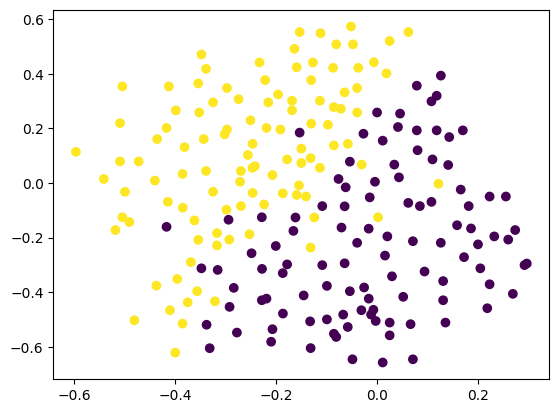

In [44]:
plt.scatter(X[:,0],X[:,1], c=y )
plt.show()

In [45]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [46]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [47]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 128)               384       
                                                                 
 dense_7 (Dense)             (None, 128)               16512     
                                                                 
 dense_8 (Dense)             (None, 128)               16512     
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 33537 (131.00 KB)
Trainable params: 33537 (131.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [48]:
adam = Adam(learning_rate=0.01)

In [49]:
model.compile(loss="binary_crossentropy", optimizer=adam,metrics=['accuracy'])

In [50]:
X.shape

(211, 2)

In [51]:
y.shape

(211,)

In [52]:
history = model.fit(X,y, epochs=500, validation_split=0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 40ms/step - loss: 0.4935 - accuracy: 0.7917 - val_loss: 0.6553 - val_accuracy: 0.6977
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.2902 - accuracy: 0.8988 - val_loss: 0.3786 - val_accuracy: 0.8372
Epoch 3/500
6/6 [==============================] - 0s 13ms/step - loss: 0.2831 - accuracy: 0.9048 - val_loss: 0.4034 - val_accuracy: 0.8372
Epoch 4/500
6/6 [==============================] - 0s 14ms/step - loss: 0.2180 - accuracy: 0.9226 - val_loss: 0.4526 - val_accuracy: 0.8372
Epoch 5/500
6/6 [==============================] - 0s 16ms/step - loss: 0.2274 - accuracy: 0.9167 - val_loss: 0.3959 - val_accuracy: 0.8605
Epoch 6/500
6/6 [==============================] - 0s 18ms/step - loss: 0.2068 - accuracy: 0.9167 - val_loss: 0.3835 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 17ms/step - loss: 0.2207 - accuracy: 0.9286 - val_loss: 0.4372 - val_accuracy: 0.8605
Epoch 8/500
6/6 [===

In [109]:
0.9286- 0.8605 # taining accuracy-validation accuracy=0.06809999999999994 (i.e. Overfitting) Lests assume our threshold = 5

0.06809999999999994

In [112]:
(0.9286- 0.8605)*100 # 6.80

6.809999999999993

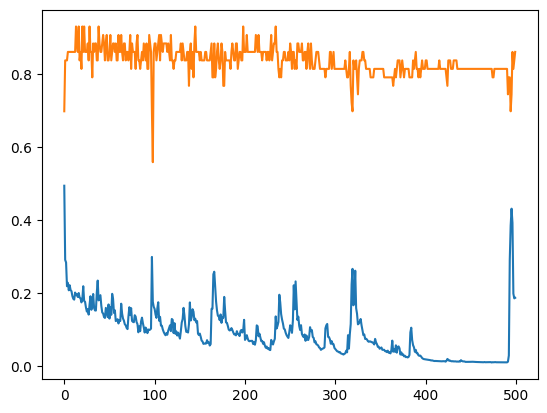

In [55]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])

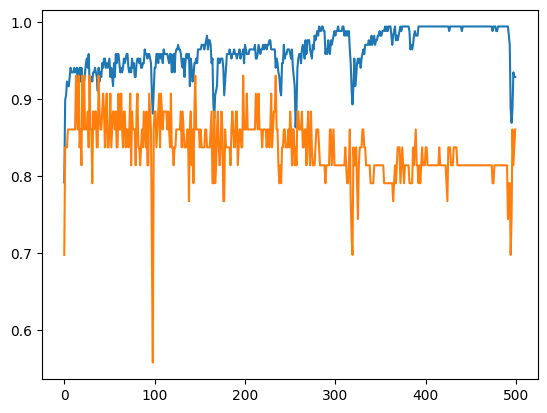

In [56]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [57]:
model = Sequential()

model.add(Dense(128, input_dim=2, activation="relu"))
model.add(Dropout(0.75))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.65))
model.add(Dense(128, activation="relu"))
model.add(Dropout(0.35))
model.add(Dense(1, activation="sigmoid"))

adam = Adam(learning_rate=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])

history = model.fit(X, y, epochs=500, validation_split = 0.2,verbose=1)

Epoch 1/500
6/6 [==============================] - 2s 43ms/step - loss: 0.6331 - accuracy: 0.7262 - val_loss: 0.6342 - val_accuracy: 0.6047
Epoch 2/500
6/6 [==============================] - 0s 10ms/step - loss: 0.4147 - accuracy: 0.8631 - val_loss: 1.0199 - val_accuracy: 0.6279
Epoch 3/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3803 - accuracy: 0.8750 - val_loss: 1.0546 - val_accuracy: 0.6047
Epoch 4/500
6/6 [==============================] - 0s 12ms/step - loss: 0.4167 - accuracy: 0.8571 - val_loss: 0.6077 - val_accuracy: 0.7209
Epoch 5/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3323 - accuracy: 0.8869 - val_loss: 0.3994 - val_accuracy: 0.8140
Epoch 6/500
6/6 [==============================] - 0s 9ms/step - loss: 0.2945 - accuracy: 0.8690 - val_loss: 0.3365 - val_accuracy: 0.8605
Epoch 7/500
6/6 [==============================] - 0s 9ms/step - loss: 0.3030 - accuracy: 0.8750 - val_loss: 0.3073 - val_accuracy: 0.8837
Epoch 8/500
6/6 [=======

In [111]:
0.8988-0.8605 # No Overfitting

0.0383

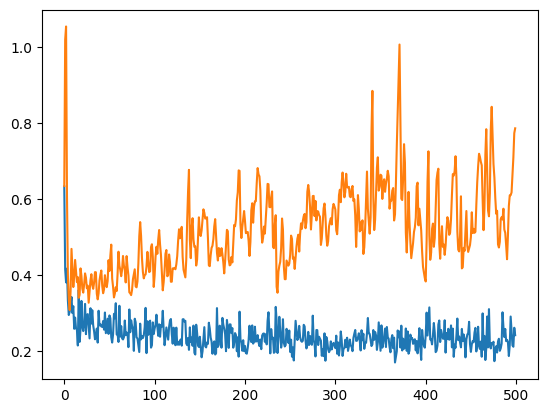

In [59]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

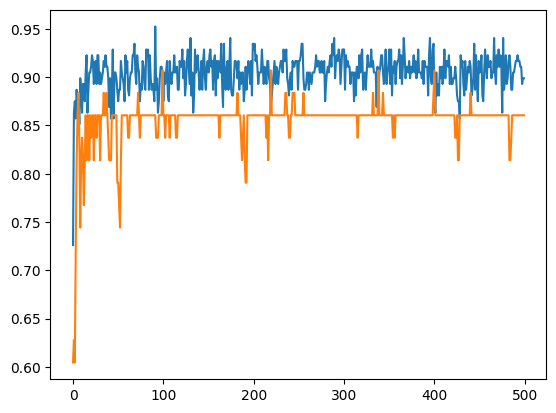

In [60]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

# 4. Regularization

## What is the Conditions we should use Regularization:

1.Whenever you have limited data

2.If you have Complex Model

3.While training Deep Neural Network

4.While Weight are too Huge

5.With high Dimension Data

In [61]:
from sklearn.datasets import make_moons
X, y = make_moons(100,noise=0.3,random_state=2)

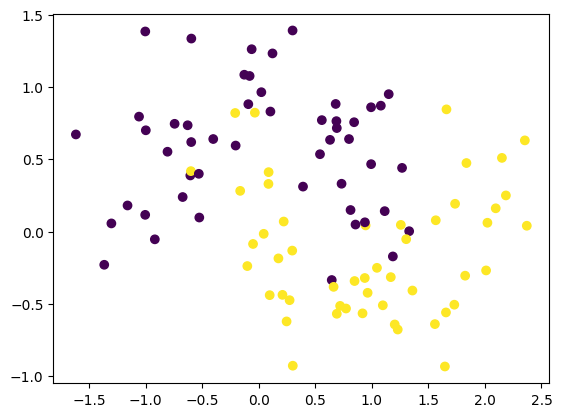

In [62]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [63]:
print(X)

[[ 0.94493687  0.04300959]
 [-0.59661667  1.3364723 ]
 [-0.10146246 -0.23842804]
 [-0.06304567  1.2627059 ]
 [ 0.99287486  0.86083134]
 [ 0.63017555  0.63509248]
 [ 0.64527331 -0.33515752]
 [-0.12816133  1.08607742]
 [-0.09264107  0.88224035]
 [ 1.07935066  0.8718443 ]
 [ 2.15044638  0.51032695]
 [ 1.65993559  0.84629567]
 [ 1.64607193 -0.93362689]
 [ 0.54133541  0.5358372 ]
 [ 1.18578357 -0.17186389]
 [ 0.29887054  1.39240581]
 [ 0.39114242  0.31161253]
 [-0.74445048  0.74634276]
 [ 0.22043346  0.06979801]
 [ 1.16747337 -0.31510162]
 [-0.60551158  0.38875206]
 [ 0.84316345  0.7572619 ]
 [ 1.04516536 -0.25068977]
 [-1.16091419  0.1810136 ]
 [ 0.27254841 -0.47465777]
 [ 0.81158401  0.14943079]
 [ 0.12125552  1.2336183 ]
 [ 1.20234455 -0.64270316]
 [ 1.22891867 -0.6778129 ]
 [ 0.17362239 -0.18539557]
 [ 0.66164226 -0.38245456]
 [ 0.85546461  0.04890891]
 [ 0.9934781   0.4669932 ]
 [-1.00476311  0.11609028]
 [-0.40292975  0.64096045]
 [ 1.72931702 -0.5059893 ]
 [ 0.68995133  0.71687993]
 

In [64]:
print(y)

[1 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0
 1 1 0 0 1 1 1 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1
 1 1 0 0 1 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 0 0]


In [65]:
model1 = Sequential()

model1.add(Dense(128,input_dim=2, activation="relu"))
model1.add(Dense(128, activation="relu"))
model1.add(Dense(1,activation='sigmoid'))

In [66]:
model1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 128)               384       
                                                                 
 dense_15 (Dense)            (None, 128)               16512     
                                                                 
 dense_16 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [67]:
adam = Adam(learning_rate=0.01)
model1.compile(loss="binary_crossentropy",optimizer=adam,metrics=["accuracy"])

In [68]:
history1 = model1.fit(X,y, epochs=1000, validation_split=0.2,verbose=1)

Epoch 1/1000
3/3 [==============================] - 1s 82ms/step - loss: 0.6102 - accuracy: 0.7125 - val_loss: 0.3634 - val_accuracy: 0.9000
Epoch 2/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.4240 - accuracy: 0.8250 - val_loss: 0.2349 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4423 - accuracy: 0.8125 - val_loss: 0.2389 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3869 - accuracy: 0.8375 - val_loss: 0.3273 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.4575 - accuracy: 0.8000 - val_loss: 0.3920 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.4192 - accuracy: 0.8250 - val_loss: 0.2956 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.3753 - accuracy: 0.8500 - val_loss: 0.2580 - val_accuracy: 0.8500
Epoch 8/1000


In [113]:
(0.9875-0.8000)*100

18.75

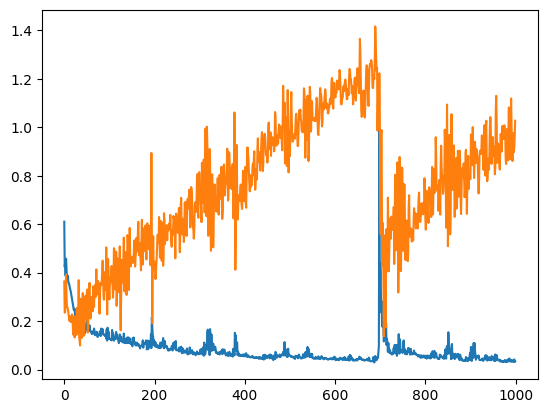

In [70]:
plt.plot(history1.history["loss"])
plt.plot(history1.history["val_loss"])

In [71]:
import tensorflow

In [72]:
model2 = Sequential()

model2.add(Dense(128,input_dim=2, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(128, activation="relu",kernel_regularizer=tensorflow.keras.regularizers.l1(0.001)))
model2.add(Dense(1,activation='sigmoid'))

In [73]:
model2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 128)               384       
                                                                 
 dense_18 (Dense)            (None, 128)               16512     
                                                                 
 dense_19 (Dense)            (None, 1)                 129       
                                                                 
Total params: 17025 (66.50 KB)
Trainable params: 17025 (66.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [74]:
adam = Adam(learning_rate=0.01)
model2.compile(loss="binary_crossentropy",optimizer=adam, metrics=['accuracy'])

In [75]:
history2=model2.fit(X,y, epochs=1000,validation_split=0.2,verbose=1)

Epoch 1/1000
3/3 [==============================] - 1s 106ms/step - loss: 1.8384 - accuracy: 0.6875 - val_loss: 1.4260 - val_accuracy: 0.9000
Epoch 2/1000
3/3 [==============================] - 0s 18ms/step - loss: 1.3761 - accuracy: 0.8250 - val_loss: 1.0611 - val_accuracy: 0.9000
Epoch 3/1000
3/3 [==============================] - 0s 17ms/step - loss: 1.0866 - accuracy: 0.8125 - val_loss: 0.8062 - val_accuracy: 0.9000
Epoch 4/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.8945 - accuracy: 0.8250 - val_loss: 0.6788 - val_accuracy: 0.9000
Epoch 5/1000
3/3 [==============================] - 0s 20ms/step - loss: 0.7663 - accuracy: 0.8375 - val_loss: 0.6655 - val_accuracy: 0.9000
Epoch 6/1000
3/3 [==============================] - 0s 17ms/step - loss: 0.7200 - accuracy: 0.8375 - val_loss: 0.6761 - val_accuracy: 0.9000
Epoch 7/1000
3/3 [==============================] - 0s 19ms/step - loss: 0.6927 - accuracy: 0.8375 - val_loss: 0.5904 - val_accuracy: 0.9000
Epoch 8/1000

In [114]:
(0.9500-0.9125)*100

3.749999999999998

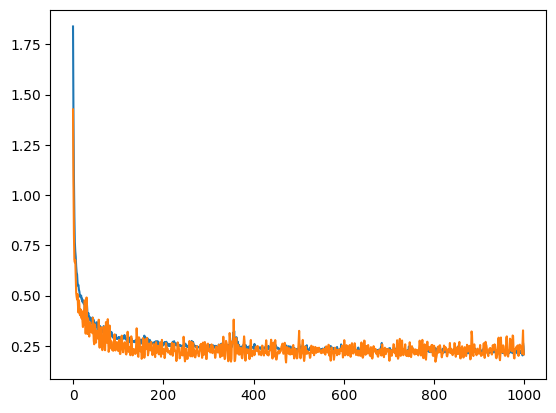

In [77]:
plt.plot(history2.history["loss"])
plt.plot(history2.history["val_loss"])

# 5. Batch Normalization

1.The type of the Data you are Taking Accuracy Graph whenther you are able to Increase the Accuray or not after the Batch Normalization

1.1 Are you able to get a Gernel Model where there is no much difference between Training and Validation Accuracy

2.Complexity of the Neural Network

3.If Data and Complexity is too much then you can check with the time aslo Batch Normalization will Converge Fast

In [78]:
from sklearn.datasets import make_circles
from numpy import where
from matplotlib import pyplot
import matplotlib.pyplot as plt

In [79]:
# generate circles
X, y = make_circles(n_samples=1500, noise=0.25, random_state=1)

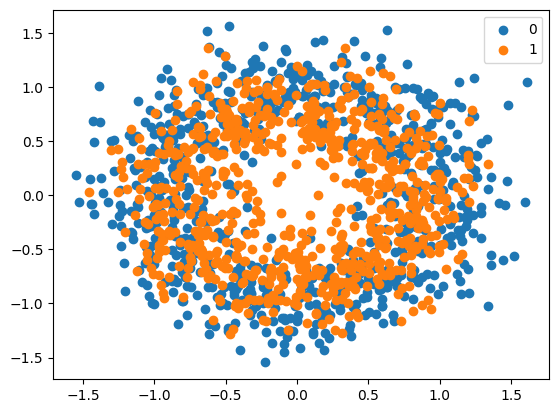

In [80]:
# select indices of points with each class label
for i in range(2):
 samples_ix = where(y == i)
 pyplot.scatter(X[samples_ix, 0], X[samples_ix, 1], label=str(i))
pyplot.legend()
pyplot.show()

In [81]:
X

array([[ 1.13748942,  1.04504851],
       [ 0.82159627,  0.75036606],
       [-0.1645428 , -0.91918992],
       ...,
       [-0.34887362, -0.02562729],
       [-0.24901179,  0.78706343],
       [-0.5148302 ,  0.38559011]])

In [82]:
y

array([0, 0, 1, ..., 1, 0, 1])

In [83]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import BatchNormalization

In [84]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               384       
                                                                 
 dense_21 (Dense)            (None, 128)               16512     
                                                                 
 dense_22 (Dense)            (None, 64)                8256      
                                                                 
 dense_23 (Dense)            (None, 64)                4160      
                                                                 
 dense_24 (Dense)            (None, 32)                2080      
                                                                 
 dense_25 (Dense)            (None, 32)                1056      
                                                                 
 dense_26 (Dense)            (None, 1)                

In [85]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [86]:
history3 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 3s 10ms/step - loss: 0.6885 - accuracy: 0.5083 - val_loss: 0.6844 - val_accuracy: 0.5133
Epoch 2/200
38/38 [==============================] - 0s 6ms/step - loss: 0.6748 - accuracy: 0.5875 - val_loss: 0.6757 - val_accuracy: 0.5900
Epoch 3/200
38/38 [==============================] - 0s 5ms/step - loss: 0.6582 - accuracy: 0.6158 - val_loss: 0.6674 - val_accuracy: 0.6100
Epoch 4/200
38/38 [==============================] - 0s 6ms/step - loss: 0.6403 - accuracy: 0.6483 - val_loss: 0.6469 - val_accuracy: 0.6100
Epoch 5/200
38/38 [==============================] - 0s 7ms/step - loss: 0.6356 - accuracy: 0.6483 - val_loss: 0.6536 - val_accuracy: 0.6067
Epoch 6/200
38/38 [==============================] - 0s 6ms/step - loss: 0.6252 - accuracy: 0.6517 - val_loss: 0.6712 - val_accuracy: 0.6067
Epoch 7/200
38/38 [==============================] - 0s 5ms/step - loss: 0.6298 - accuracy: 0.6450 - val_loss: 0.6332 - val_accuracy: 0.6333
Epoch 8/200


In [115]:
0.7050-0.5700

0.135

# Why the Batch Normalization is Used

1. For Fast Training

2. For Removing the Covariate Shift

In [88]:
model = Sequential()

model.add(Dense(128,activation='relu',input_dim=2))
model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(64,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(1,activation='sigmoid'))

model.summary()



Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 128)               384       
                                                                 
 dense_28 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization (Batch  (None, 128)               512       
 Normalization)                                                  
                                                                 
 dense_29 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_1 (Bat  (None, 64)                256       
 chNormalization)                                                
                                                                 
 dense_30 (Dense)            (None, 64)               

In [89]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [90]:
history4 = model.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
38/38 [==============================] - 5s 15ms/step - loss: 0.7109 - accuracy: 0.5950 - val_loss: 0.6923 - val_accuracy: 0.5133
Epoch 2/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6508 - accuracy: 0.6392 - val_loss: 0.7019 - val_accuracy: 0.5133
Epoch 3/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6564 - accuracy: 0.6017 - val_loss: 0.7011 - val_accuracy: 0.5133
Epoch 4/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6453 - accuracy: 0.6442 - val_loss: 0.7049 - val_accuracy: 0.5133
Epoch 5/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6463 - accuracy: 0.6417 - val_loss: 0.6971 - val_accuracy: 0.5367
Epoch 6/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6218 - accuracy: 0.6425 - val_loss: 0.6882 - val_accuracy: 0.5367
Epoch 7/200
38/38 [==============================] - 0s 9ms/step - loss: 0.6369 - accuracy: 0.6417 - val_loss: 0.6843 - val_accuracy: 0.5533
Epoch 8/200


In [116]:
0.6733-0.6133

0.06000000000000005

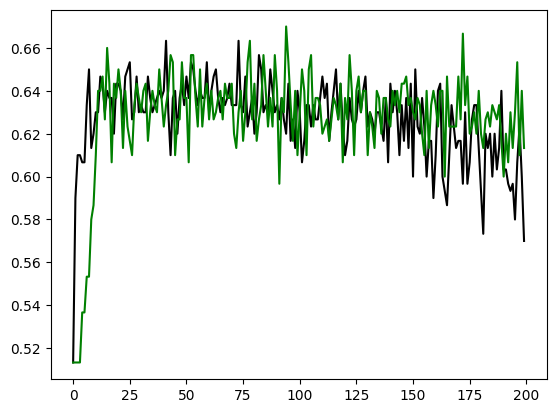

In [92]:
plt.plot(history3.history['val_accuracy'],color='black')
plt.plot(history4.history['val_accuracy'],color='green')

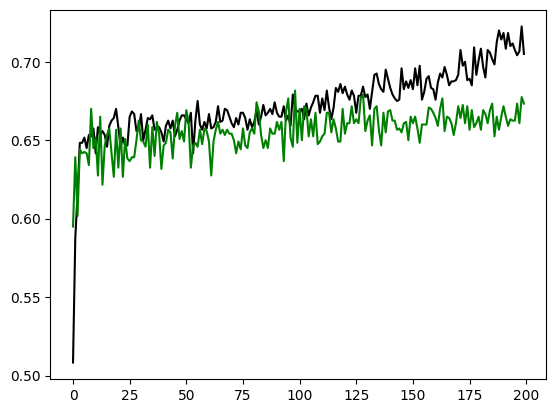

In [93]:
plt.plot(history3.history['accuracy'],color='black')
plt.plot(history4.history['accuracy'],color='green')

In [94]:
column_names = ['Feature1', 'Feature2', 'Class']

In [95]:
data=pd.read_csv("https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv",header=None,names=column_names)

In [96]:
data.head()

,Feature1,Feature2,Class
0,0.031595,0.986988,0.0
1,2.115098,-0.046244,1.0
2,0.882490,-0.075756,0.0
3,-0.055144,-0.037332,1.0
4,0.829545,-0.539321,1.0


In [97]:
data.shape

(100, 3)

In [98]:
X = data.iloc[:,:2].values
y = data.iloc[:,-1]

In [99]:
X

array([[ 0.03159499,  0.98698776],
       [ 2.11509784, -0.04624397],
       [ 0.88248972, -0.07575606],
       [-0.0551441 , -0.03733246],
       [ 0.82954503, -0.53932149],
       [ 2.11285708,  0.66208353],
       [ 0.5696927 ,  0.33744136],
       [ 0.95217454, -0.75307471],
       [-0.02922115,  0.39287336],
       [ 1.71579557,  0.36069454],
       [-0.27883014,  0.61420539],
       [ 2.00344509, -0.3091496 ],
       [ 1.50009616, -0.74636376],
       [ 1.22540835,  1.19793017],
       [ 0.46730819,  0.54703192],
       [-0.36653222,  1.11971633],
       [ 0.30124459,  1.23315697],
       [ 0.30430746,  0.82373935],
       [-0.23712492,  0.77876034],
       [ 1.16339832,  0.55290238],
       [-0.59702417,  0.6572361 ],
       [ 0.46356735, -0.1951543 ],
       [ 0.68451111,  0.75287685],
       [ 0.70515699, -0.45892444],
       [-0.65805008, -0.12944211],
       [-0.74662946, -0.3829632 ],
       [ 0.60585226,  0.31252842],
       [ 2.18137168, -0.02291747],
       [ 1.91980633,

In [100]:
y

0     0.0
1     1.0
2     0.0
3     1.0
4     1.0
     ... 
95    1.0
96    1.0
97    1.0
98    0.0
99    0.0
Name: Class, Length: 100, dtype: float64

In [121]:
model5 = Sequential()

model5.add(Dense(2,activation='relu',input_dim=2))
model5.add(Dense(2,activation='relu'))
model5.add(Dense(1,activation='sigmoid'))

model5.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 2)                 6         
                                                                 
 dense_44 (Dense)            (None, 2)                 6         
                                                                 
 dense_45 (Dense)            (None, 1)                 3         
                                                                 
Total params: 15 (60.00 Byte)
Trainable params: 15 (60.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [122]:
model5.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [123]:
history5 = model5.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 1s 88ms/step - loss: 0.6933 - accuracy: 0.3875 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.4875 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6932 - accuracy: 0.4000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 4/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 5/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 6/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6930 - val_accuracy: 0.5500
Epoch 8/200
3/3 [===

In [124]:
model6 = Sequential()

model6.add(Dense(3,activation='relu',input_dim=2))
model6.add(BatchNormalization())
model6.add(Dense(2,activation='relu'))
model6.add(BatchNormalization())
model6.add(Dense(1,activation='sigmoid'))

model6.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_46 (Dense)            (None, 3)                 9         
                                                                 
 batch_normalization_7 (Bat  (None, 3)                 12        
 chNormalization)                                                
                                                                 
 dense_47 (Dense)            (None, 2)                 8         
                                                                 
 batch_normalization_8 (Bat  (None, 2)                 8         
 chNormalization)                                                
                                                                 
 dense_48 (Dense)            (None, 1)                 3         
                                                                 
Total params: 40 (160.00 Byte)
Trainable params: 30 (

In [125]:
model6.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [126]:
history6 = model6.fit(X,y,epochs=200,validation_split=0.2)

Epoch 1/200
3/3 [==============================] - 3s 107ms/step - loss: 0.6404 - accuracy: 0.6125 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6277 - accuracy: 0.5875 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 3/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6426 - accuracy: 0.6000 - val_loss: 0.6915 - val_accuracy: 0.5000
Epoch 4/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6250 - accuracy: 0.6125 - val_loss: 0.6916 - val_accuracy: 0.5500
Epoch 5/200
3/3 [==============================] - 0s 19ms/step - loss: 0.6286 - accuracy: 0.6125 - val_loss: 0.6917 - val_accuracy: 0.5500
Epoch 6/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6509 - accuracy: 0.6000 - val_loss: 0.6917 - val_accuracy: 0.5500
Epoch 7/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6169 - accuracy: 0.6125 - val_loss: 0.6917 - val_accuracy: 0.5500
Epoch 8/200
3/3 [==

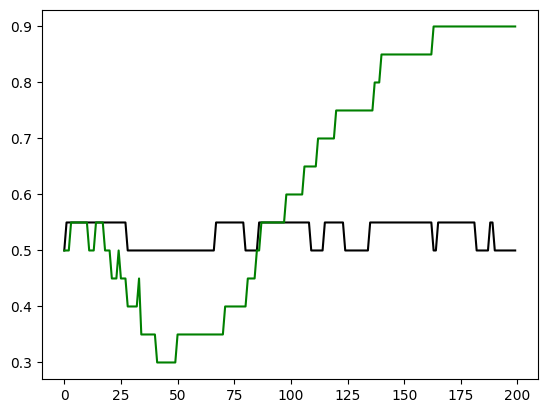

In [127]:
plt.plot(history5.history['val_accuracy'],color='black')
plt.plot(history6.history['val_accuracy'],color='green')

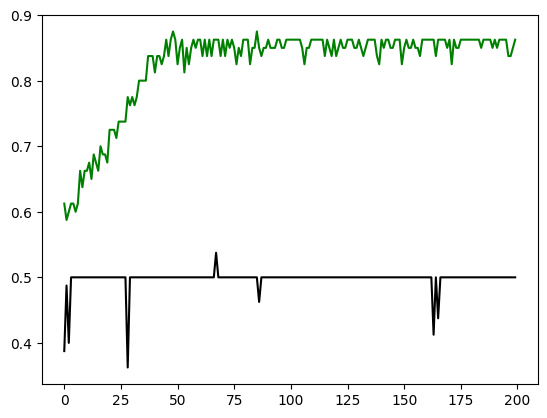

In [128]:
plt.plot(history5.history['accuracy'],color='black')
plt.plot(history6.history['accuracy'],color='green')

# 6. Weight Initialization

In [156]:
column_names = ['Feature1', 'Feature2', 'Class']

In [157]:
data=pd.read_csv("https://raw.githubusercontent.com/Adityarajora/Complete-KNN-visualization/master/1.ushape.csv",header=None,names=column_names)

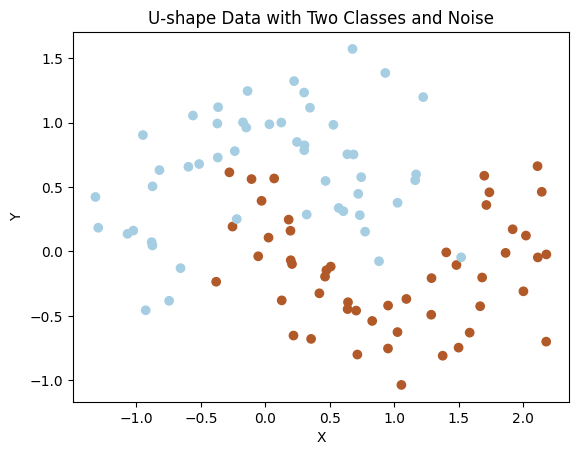

In [158]:
# Visualize the U-shape data with two classes and noise
plt.scatter(data['Feature1'], data['Feature2'], c=data["Class"], cmap=plt.cm.Paired)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('U-shape Data with Two Classes and Noise')
plt.show()

In [159]:
X = df.iloc[:,0:2].values
y = df.iloc[:,-1].values

In [160]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [161]:
model = Sequential()

model.add(Dense(2,activation='sigmoid',input_dim=2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_53 (Dense)            (None, 2)                 6         
                                                                 
 dense_54 (Dense)            (None, 1)                 3         
                                                                 
Total params: 9 (36.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [162]:
# Set parameters to 0
model.get_weights()

[array([[1.1743764 , 0.01111388],
        [0.73490524, 0.34747505]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.40941715],
        [0.5177299 ]], dtype=float32),
 array([0.], dtype=float32)]

In [163]:
initial_weights = model.get_weights()

In [164]:
initial_weights

[array([[1.1743764 , 0.01111388],
        [0.73490524, 0.34747505]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.40941715],
        [0.5177299 ]], dtype=float32),
 array([0.], dtype=float32)]

In [165]:
initial_weights[0] = np.zeros(model.get_weights()[0].shape)*0.5
initial_weights[1] = np.zeros(model.get_weights()[1].shape)*0.5
initial_weights[2] = np.zeros(model.get_weights()[2].shape)*0.5
initial_weights[3] = np.zeros(model.get_weights()[3].shape)*0.5

In [166]:
model.set_weights(initial_weights)

In [167]:
model.get_weights()

[array([[0., 0.],
        [0., 0.]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.],
        [0.]], dtype=float32),
 array([0.], dtype=float32)]

In [168]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [169]:
history7 = model.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 1s 22ms/step - loss: 0.6903 - accuracy: 0.7125 - val_loss: 0.6971 - val_accuracy: 0.3625
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6846 - accuracy: 0.7125 - val_loss: 0.7012 - val_accuracy: 0.3625
Epoch 3/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6792 - accuracy: 0.7125 - val_loss: 0.7055 - val_accuracy: 0.3625
Epoch 4/100
10/10 [==============================] - 0s 8ms/step - loss: 0.6739 - accuracy: 0.7125 - val_loss: 0.7099 - val_accuracy: 0.3625
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6687 - accuracy: 0.7125 - val_loss: 0.7142 - val_accuracy: 0.3625
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.6643 - accuracy: 0.7125 - val_loss: 0.7189 - val_accuracy: 0.3625
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.6599 - accuracy: 0.7125 - val_loss: 0.7236 - val_accuracy: 0.3625
Epoch 8/100


In [170]:
model.get_weights()

[array([[0.00554214, 0.00554214],
        [0.00555889, 0.00555889]], dtype=float32),
 array([0.00525309, 0.00525309], dtype=float32),
 array([[-0.30067897],
        [-0.30067897]], dtype=float32),
 array([-0.2997796], dtype=float32)]

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

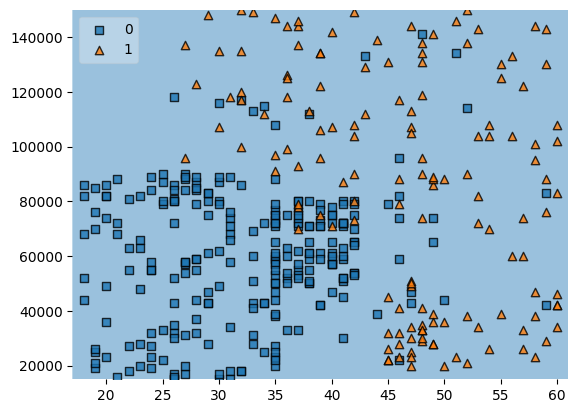

In [171]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model, legend=2)

In [181]:
model2 = Sequential()

model2.add(Dense(10,activation='sigmoid',input_dim=2))
model2.add(Dense(1,activation='sigmoid'))

model2.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_57 (Dense)            (None, 10)                30        
                                                                 
 dense_58 (Dense)            (None, 1)                 11        
                                                                 
Total params: 41 (164.00 Byte)
Trainable params: 41 (164.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [182]:
# Set parameters to 0
model2.get_weights()

[array([[ 0.634867  , -0.5068403 , -0.16428387,  0.37392384, -0.22798696,
         -0.4286405 , -0.22409514, -0.18561828,  0.06944281, -0.5659644 ],
        [ 0.48464292, -0.11571503,  0.25387526,  0.28744316, -0.25117162,
         -0.02970409,  0.40943688, -0.2841023 , -0.4169124 , -0.01082736]],
       dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32),
 array([[ 0.65469426],
        [ 0.30340236],
        [ 0.42751664],
        [ 0.5157891 ],
        [ 0.7077399 ],
        [-0.11132193],
        [ 0.43337983],
        [-0.35911602],
        [ 0.41049916],
        [ 0.7054853 ]], dtype=float32),
 array([0.], dtype=float32)]

In [174]:
initial_weights = model2.get_weights()

In [183]:
initial_weights[0] = np.ones(model2.get_weights()[0].shape)
initial_weights[1] = np.ones(model2.get_weights()[1].shape)
initial_weights[2] = np.ones(model2.get_weights()[2].shape)
initial_weights[3] = np.ones(model2.get_weights()[3].shape)

In [184]:
model2.set_weights(initial_weights)

In [185]:
model2.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]], dtype=float32),
 array([1.], dtype=float32)]

In [186]:
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [187]:
history8 = model2.fit(X,y,epochs=100,validation_split=0.2)

Epoch 1/100
10/10 [==============================] - 2s 21ms/step - loss: 7.8035 - accuracy: 0.2875 - val_loss: 3.9479 - val_accuracy: 0.6375
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 7.7240 - accuracy: 0.2875 - val_loss: 3.9086 - val_accuracy: 0.6375
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 7.6462 - accuracy: 0.2875 - val_loss: 3.8690 - val_accuracy: 0.6375
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 7.5689 - accuracy: 0.2875 - val_loss: 3.8293 - val_accuracy: 0.6375
Epoch 5/100
10/10 [==============================] - 0s 7ms/step - loss: 7.4906 - accuracy: 0.2875 - val_loss: 3.7896 - val_accuracy: 0.6375
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 7.4132 - accuracy: 0.2875 - val_loss: 3.7499 - val_accuracy: 0.6375
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 7.3348 - accuracy: 0.2875 - val_loss: 3.7104 - val_accuracy: 0.6375
Epoch 8/100


In [188]:
model2.get_weights()

[array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]], dtype=float32),
 array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.], dtype=float32),
 array([[0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859],
        [0.06110859]], dtype=float32),
 array([0.06110847], dtype=float32)]

9600/9600 [==============================] - 15s 2ms/step


<Axes: >

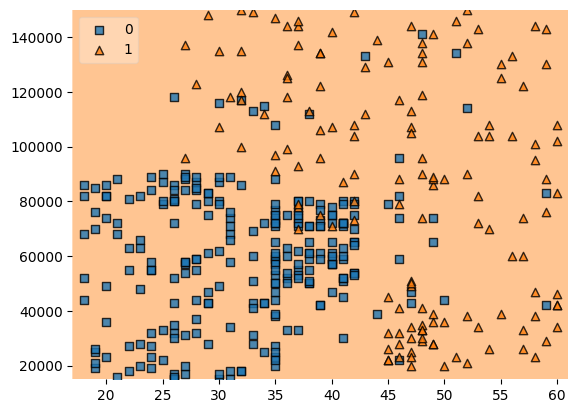

In [189]:
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(X,y.astype('int'), clf=model2, legend=2)

For more Details:- https://github.com/SuchindraKumar/Deep_Learning/blob/main/Vanishing_Gradient_Problem_%26__Weight_Initialization_in_ANN_Practical.ipynb